# NLP相关

## 马尔科夫过程

### 随机过程(过程)
设T是一无限实数集，把依赖于参数$t\in T$的一族(无限多个)随机变量称为随机过程，记为{X(t), $t\in T$}
### 状态|状态空间
我们常把t看作为时间，成X{t}为时刻t时过程的状态。

对于一切$t\in T$, X(t)所有可能去的一切智的全体称为随机过程的状态空间。
### 马尔可夫性(无后效性)
过程或系统在时刻t0所处的状态为已知的条件下，过程在时刻t>t0所处状态的条件分布与过程在时刻t0之前所处的状态无关。

通俗的说，就是在已知过程“现在”的条件下，其“将来”不依赖于“过去”
### 马尔科夫过程
符合马尔科夫性的过程
### 马氏链、齐次马氏链
时间和状态都是离散的马尔科夫过程称为马尔科夫链

如果转移概率矩阵P(t)与t无关，则称该马氏链是齐次马氏链
### 转移概率矩阵、一步转移概率矩阵
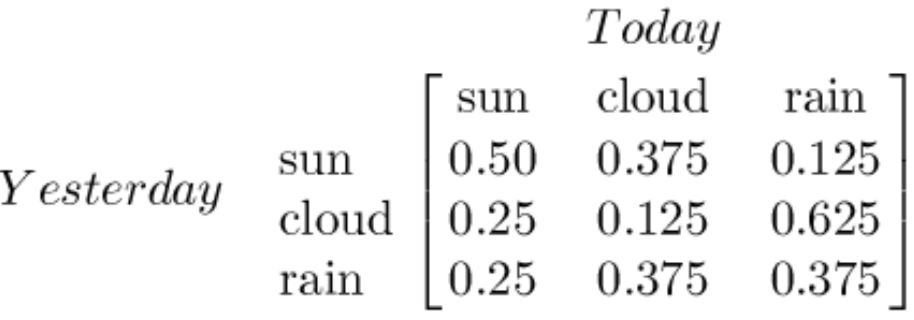

#### 求多步转移概率矩阵
C-K方程，转化为求一步转移概率矩阵的幂。

对于齐次马氏链而言，n步转移概率矩阵是一步转移概率矩阵的n次方

### 遍历性
即 n步转移概率 当n取极限时，和起始态无关，只与要转移到终态有关！
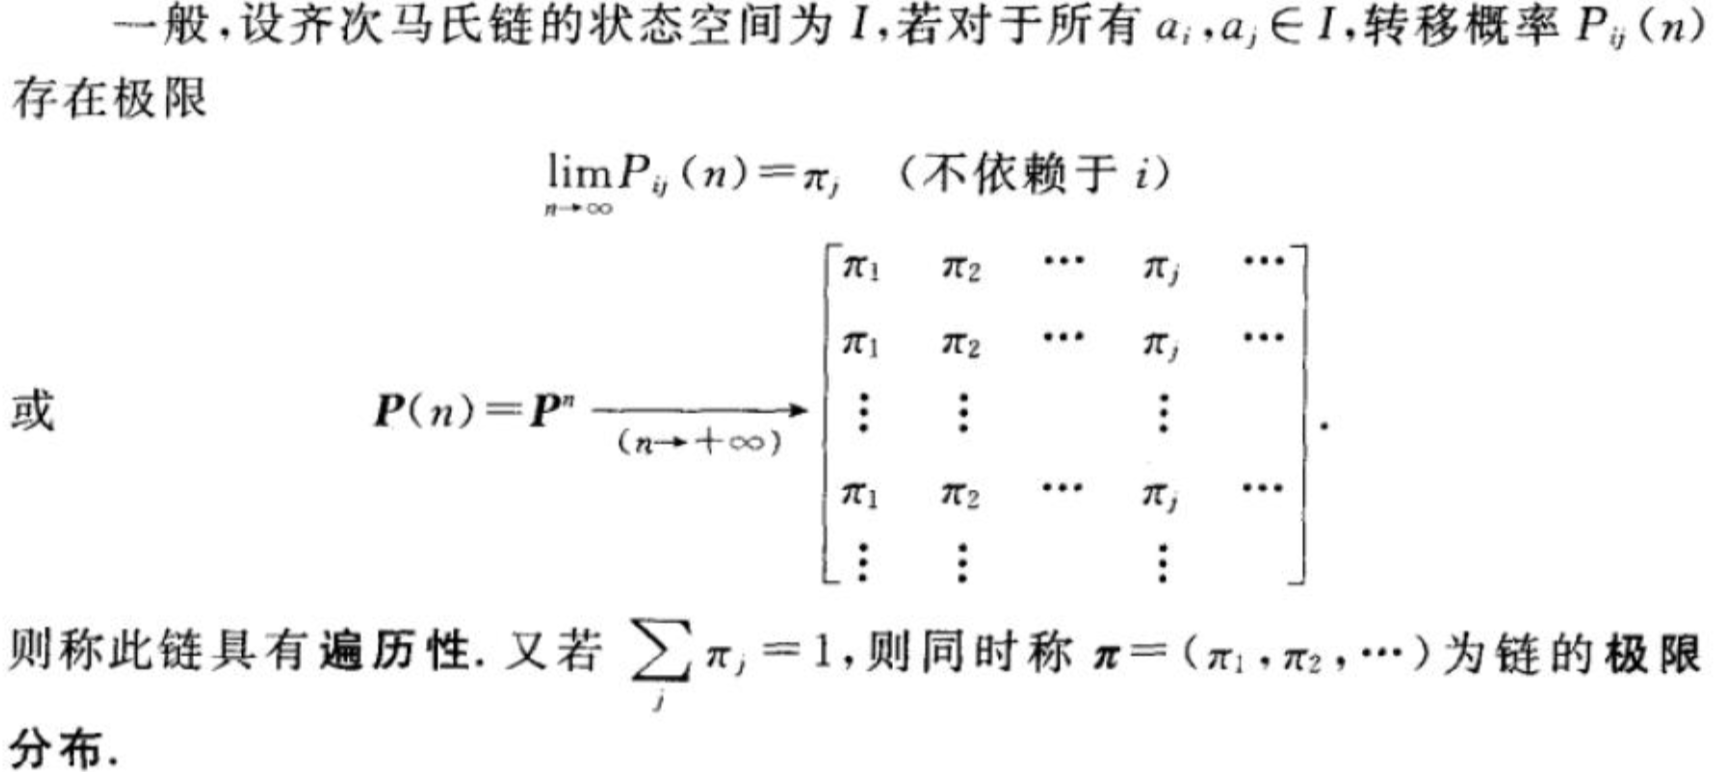

如果 转移概率矩阵中的值都大于0，在该马氏链具有遍历性！
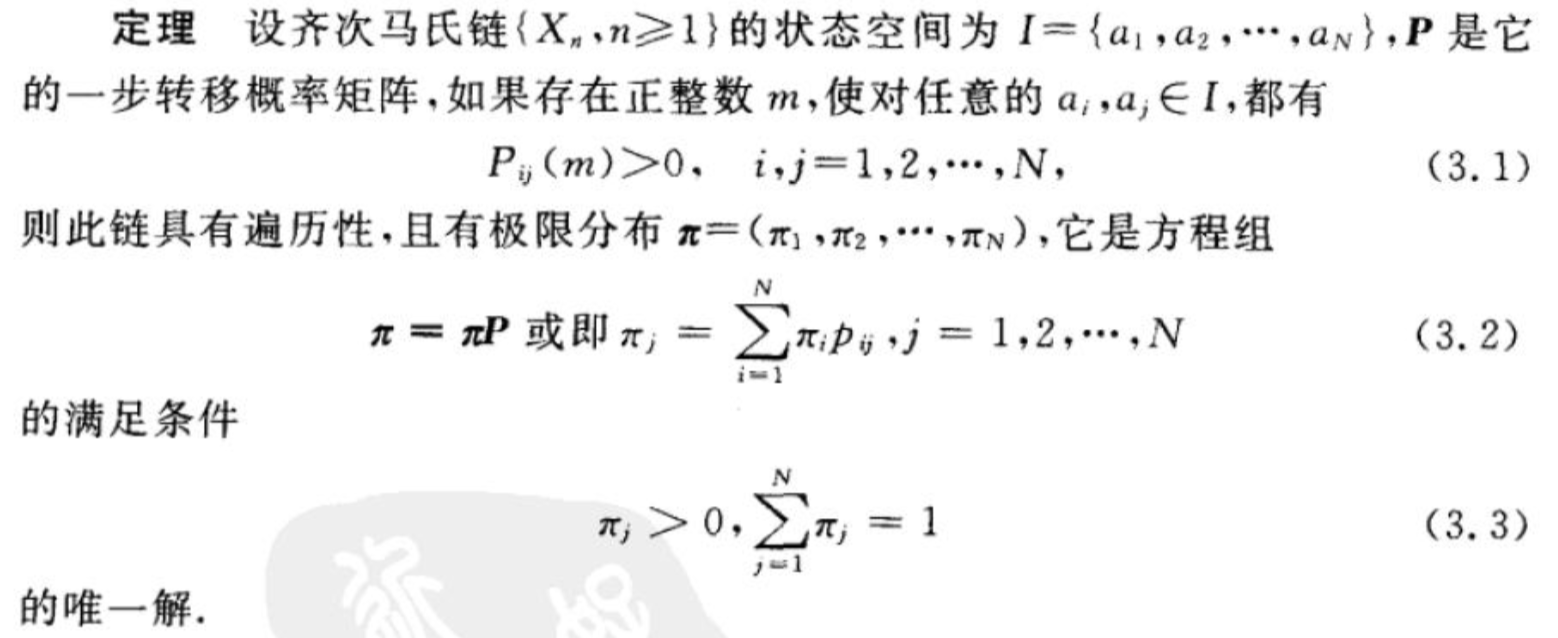

## 隐马尔科夫过程(HMM)
https://www.cnblogs.com/pinard/p/6945257.html

### 什么样的问题需要HMM模型
首先我们来看看什么样的问题解决可以用HMM模型。使用HMM模型时我们的问题一般有这两个特征：１）我们的问题是基于序列的，比如时间序列，或者状态序列。２）我们的问题中有两类数据，一类序列数据是可以观测到的，即观测序列；而另一类数据是不能观察到的，即隐藏状态序列，简称状态序列。

　　　　有了这两个特征，那么这个问题一般可以用HMM模型来尝试解决。这样的问题在实际生活中是很多的。比如：我现在在打字写博客，我在键盘上敲出来的一系列字符就是观测序列，而我实际想写的一段话就是隐藏序列，输入法的任务就是从敲入的一系列字符尽可能的猜测我要写的一段话，并把最可能的词语放在最前面让我选择，这就可以看做一个HMM模型了。再举一个，我在和你说话，我发出的一串连续的声音就是观测序列，而我实际要表达的一段话就是状态序列，你大脑的任务，就是从这一串连续的声音中判断出我最可能要表达的话的内容。

　　　　从这些例子中，我们可以发现，HMM模型可以无处不在。但是上面的描述还不精确，下面我们用精确的数学符号来表述我们的HMM模型。
### HMM模型的定义
对于HMM模型，首先我们假设𝑄是所有可能的隐藏状态的集合，𝑉是所有可能的观测状态的集合，即：
𝑄={𝑞1,𝑞2,...,𝑞𝑁},𝑉={𝑣1,𝑣2,...𝑣𝑀}

其中，𝑁是可能的隐藏状态数，𝑀是所有的可能的观察状态数。

对于一个长度为𝑇的序列，𝐼对应的状态序列, 𝑂是对应的观察序列，即：
𝐼={𝑖1,𝑖2,...,𝑖𝑇},𝑂={𝑜1,𝑜2,...𝑜𝑇}

其中，任意一个隐藏状态𝑖𝑡∈𝑄,任意一个观察状态𝑜𝑡∈𝑉
#### HMM模型做了两个很重要的假设

1） 齐次马尔科夫链假设。即任意时刻的隐藏状态只依赖于它前一个隐藏状态。

当然这样假设有点极端，因为很多时候我们的某一个隐藏状态不仅仅只依赖于前一个隐藏状态，可能是前两个或者是前三个。但是这样假设的好处就是模型简单，便于求解。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑖,在时刻𝑡+1的隐藏状态是𝑖𝑡+1=𝑞𝑗, 则从时刻𝑡到时刻𝑡+1的HMM状态转移概率𝑎𝑖𝑗可以表示为：
$$a_{ij}=P(i_{t+1}=q_j|i_t=q_i)$$
这样𝑎𝑖𝑗可以组成马尔科夫链的状态转移矩阵𝐴:
$$A=[a_{ij}]_{N*N}$$
2） 观测独立性假设。  
即任意时刻的观察状态只仅仅依赖于当前时刻的隐藏状态，这也是一个为了简化模型的假设。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑗, 而对应的观察状态为𝑜𝑡=𝑣𝑘, 则该时刻观察状态𝑣𝑘在隐藏状态𝑞𝑗下生成的概率为𝑏𝑗(𝑘),满足：
$$b_j(k)=P(o_t=v_k|i_t=q_j)$$
这样𝑏𝑗(𝑘)可以组成观测状态生成的概率矩阵𝐵:
$$B=[b_j(k)]_{N*M}$$

一个HMM模型，可以由隐藏状态初始概率分布$\Pi$, 状态转移概率矩阵𝐴和观测状态概率矩阵𝐵决定。$\Pi$,𝐴决定状态序列，𝐵决定观测序列。因此，HMM模型可以由一个三元组𝜆表示如下：
$$\lambda=(A,B,\Pi)$$

## HMM模型的三个基本问题
HMM模型一共有三个经典的问题需要解决：

* 1） 评估观察序列概率。即给定模型𝜆=(𝐴,𝐵,Π)和观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，计算在模型𝜆下观测序列𝑂出现的概率𝑃(𝑂|𝜆)。  
这个问题的求解需要用到前向后向算法，我们在这个系列的第二篇会详细讲解。这个问题是HMM模型三个问题中最简单的。

* 2）模型参数学习问题。即给定观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，估计模型𝜆=(𝐴,𝐵,Π)的参数，使该模型下观测序列的条件概率𝑃(𝑂|𝜆)最大。  
这个问题的求解需要用到基于EM算法的鲍姆-韦尔奇算法， 我们在这个系列的第三篇会详细讲解。这个问题是HMM模型三个问题中最复杂的。

* 3）预测问题，也称为解码问题。即给定模型𝜆=(𝐴,𝐵,Π)和观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，求给定观测序列条件下，最可能出现的对应的状态序列，这个问题的求解需要用到基于动态规划的维特比算法，我们在这个系列的第四篇会详细讲解。  
这个问题是HMM模型三个问题中复杂度居中的算法。

### 求解评估观察序列概率
前向后向算法是前向算法和后向算法的统称，这两个算法都可以用来求HMM观测序列的概率。我们先来看看前向算法是如何求解这个问题的。
#### 前向算法
前向算法本质上属于动态规划的算法，也就是我们要通过找到局部状态递推的公式，这样一步步的从子问题的最优解拓展到整个问题的最优解。

在前向算法中，通过定义“前向概率”来定义动态规划的这个局部状态。

什么是前向概率呢, 其实定义很简单：定义时刻𝑡时隐藏状态为𝑞𝑖, 观测状态的序列为𝑜1,𝑜2,...𝑜𝑡的概率为前向概率。记为：
$$𝛼_𝑡(𝑖)=𝑃(𝑜1,𝑜2,...𝑜𝑡,𝑖𝑡=𝑞𝑖|𝜆)$$

基于动态觃划思想的格架算法
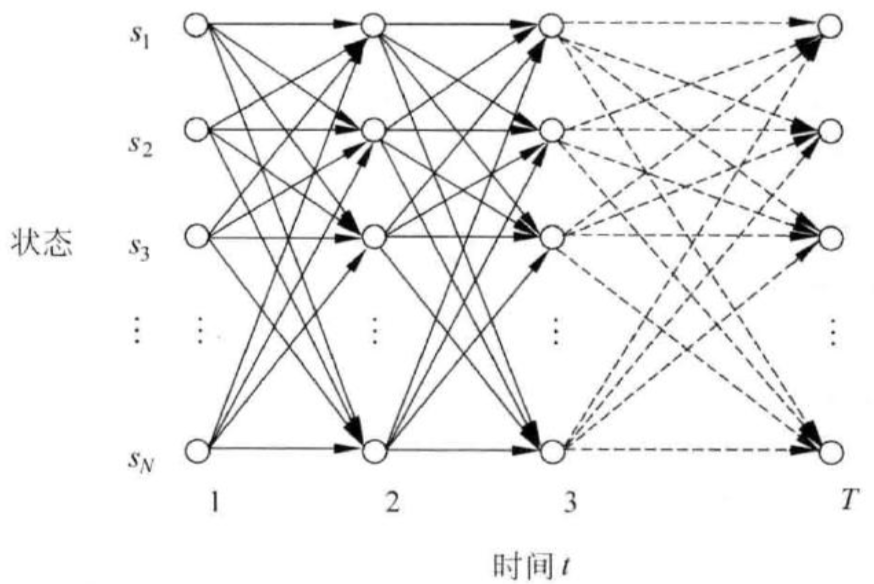

下面总结下前向算法。

输入：HMM模型𝜆=(𝐴,𝐵,Π)，观测序列𝑂=(𝑜1,𝑜2,...𝑜𝑇)

输出：观测序列概率𝑃(𝑂|𝜆)

1) 计算时刻1的各个隐藏状态前向概率：
$$𝛼_1(𝑖)=𝜋_𝑖𝑏_𝑖(𝑜_1),𝑖=1,2,...𝑁$$

2) 递推时刻2,3,...𝑇时刻的前向概率：
$$𝛼_{𝑡+1}(𝑖)=[\sum_{𝑗=1}^𝑁𝛼_𝑡(𝑗)𝑎_{𝑗𝑖}]𝑏_𝑖(𝑜_{𝑡+1}),𝑖=1,2,...𝑁$$
方框号里计算的是当t时刻所有的隐藏状态转移到状态i的概率，然后在乘以状态i时发射观测训练o_t+1

3) 计算最终结果：
$$𝑃(𝑂|𝜆)=\sum_{𝑖=1}^𝑁𝛼_𝑇(𝑖)$$

从递推公式可以看出，我们的算法时间复杂度是$𝑂(𝑇𝑁^2)$，比暴力解法的时间复杂度$𝑂(𝑇𝑁^𝑇)$少了几个数量级

#### 后向算法(略)

#### 应用实例1
* 𝑉={0，1}，𝑀=2
* 𝑄={盒子1，盒子2，盒子3}，𝑁=3

In [49]:
pi = [0.2,0.4,0.4]
A = np.array([
    [0.5, 0.2, 0.3],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

In [50]:
B = np.array([
    [0.5, 0.5],
    [0.4, 0.6],
    [0.7, 0.3]
])
𝑂=[0, 1, 0]

In [51]:
for i in range(len(O)):
    if i==0: a = np.array(pi).reshape([3,1])*(B[:, O[i]].reshape([3,1]))
    else:
        a = (a*A).sum(axis=0).reshape([3,1])*(B[:, O[i]].reshape([3,1]))
print(a.sum())

0.130218


#### 应用实例1
假设手里有三个不同的骰子。第一个骰子是我们平常见的骰子(称这个骰子为D6)， 6个面，每个面(1，2，3，4，5，6)出现的概率是1/6。第二个骰子是个四面体(称 这个骰子为D4)，每个面(1，2，3，4)出现的概率是1/4。第三个骰子有八个面 (称这个骰子为D8)，每个面(1，2，3，4，5，6，7，8)出现的概率是1/8。求出现可观测序列为“1635273524”的概率
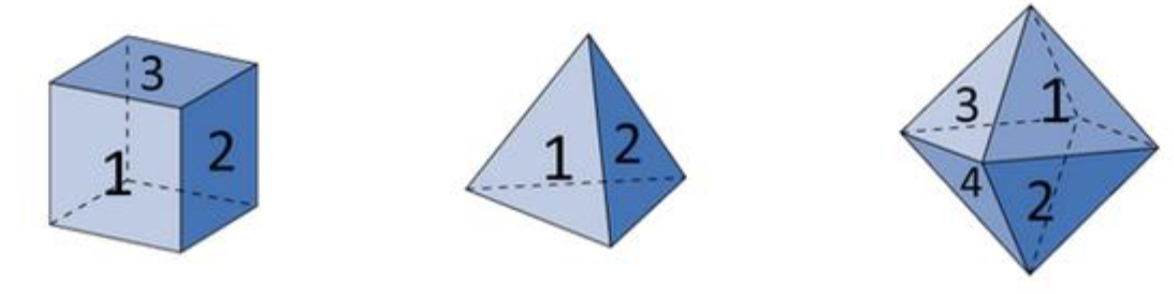

In [1]:
import numpy as np

In [2]:
A = np.ones([3,3])*1/3
A

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [9]:
B = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0,],
    [1/4, 1/4, 1/4, 0, 0, 0, 0, 0,],
    [1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
])
B

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ]])

In [8]:
pi = np.array([[1/3, 1/3, 1/3]]).T
pi

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [24]:
o_series = [int(i) for i in '1635273524']
o_series

[1, 6, 3, 5, 2, 7, 3, 5, 2, 4]

In [22]:
a1 = pi * (B[:,0].reshape([3, 1]))
a1

array([[0.05555556],
       [0.08333333],
       [0.08333333]])

In [21]:
a1 * A

array([[0.01851852, 0.01851852, 0.01851852],
       [0.02777778, 0.02777778, 0.02777778],
       [0.02777778, 0.02777778, 0.02777778]])

In [23]:
a2 = (a1 * A).sum(axis=0).reshape([3, 1])*(B[:,6-1].reshape([3, 1]))
a2

array([[0.01234568],
       [0.        ],
       [0.01851852]])

In [45]:
result = np.zeros([3, 10])  # 用于记录每一步的前向概率ai

In [41]:
result[:, 0] = (pi * (B[:,0].reshape([3, 1]))).reshape(3)

In [40]:
(pi * (B[:,0].reshape([3, 1]))).reshape(3)

array([0.05555556, 0.08333333, 0.08333333])

In [43]:
for i in range(len(o_series)):
    if i==0: result[:, i] = (pi * (B[:,0].reshape([3, 1]))).reshape(3)
    else: result[:, i] = ((result[:, i-1].reshape([3, 1]) * A).sum(axis=0).reshape([3, 1])*(B[:,o_series[i]-1].reshape([3, 1]))).reshape(3)
print(result)

[[5.55555556e-02 1.23456790e-02 1.71467764e-03 3.81039476e-04
  5.29221494e-05 0.00000000e+00 9.80039804e-07 2.17786623e-07
  3.02481421e-08 6.72180935e-09]
 [8.33333333e-02 0.00000000e+00 2.57201646e-03 0.00000000e+00
  7.93832241e-05 0.00000000e+00 1.47005971e-06 0.00000000e+00
  4.53722131e-08 0.00000000e+00]
 [8.33333333e-02 1.85185185e-02 2.57201646e-03 5.71559214e-04
  7.93832241e-05 1.76407165e-05 1.47005971e-06 3.26679935e-07
  4.53722131e-08 1.00827140e-08]]


In [44]:
# 答案
result[:, -1].sum()

1.680452338354945e-08